# Imports & Libraries

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import LSTM, Dense
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras import backend as K
!pip install umap-learn
from umap.umap_ import UMAP
from sklearn.cluster import DBSCAN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


# Connecting to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Constants

In [ ]:
dataset_path = '/content/drive/MyDrive/RWF-2000/train'
test_path = '/content/drive/MyDrive/RWF-2000/val'
model_path = '/content/drive/MyDrive/3DCNN-model'
video_val_fight_folder = '/content/drive/MyDrive/RWF-2000/val/Fight'
video_val_nonFight_folder = '/content/drive/MyDrive/RWF-2000/val/NonFight'
frame_height = 160
frame_width = 160
sequence_length = 10
sampling_rate = 5
resize_dim = (frame_height, frame_width)
frames = []


# Load video frames

In [ ]:
def load_Videos(path):
    list_of_video_paths = []
    video_files = [file for file in os.listdir(path) if file.endswith('.avi')]
    for video_file in video_files:
          video_path = os.path.join(path, video_file)
          list_of_video_paths.append(video_path)
    return list_of_video_paths


def load_and_read_video_frames(video_path, num_frames, frame_height, frame_width,num_channels):
    cap = cv2.VideoCapture(video_path)
    frames = []
    for _ in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (frame_width, frame_height))
        normalized_frame = frame / 255.0
        frames.append(normalized_frame)
    cap.release()
    frames = np.array(frames)
    return frames

In [ ]:
# get Val(Fight and NonFight) video paths
Val_Fight_videos = load_Videos(video_val_fight_folder)
Val_NonFight_videos = load_Videos(video_val_nonFight_folder)

In [ ]:
# combine Fight and NonFight Val video paths
Val_videos = Val_Fight_videos + Val_NonFight_videos
val_videos = np.array(Val_videos)
len(val_videos)

400

In [ ]:
# Actual labels for Fight[1] and NonFight[0] Val videos then combine them
Val_Fight_labels = [1] * len(Val_Fight_videos)
Val_NonFight_labels = [0] * len(Val_NonFight_videos)

Actual_Val_labels = Val_Fight_labels + Val_NonFight_labels
val_labels = np.array(Actual_Val_labels)
len(Actual_Val_labels)

400

# Load the model and extract the features from violent videos

In [ ]:
model = tf.keras.models.load_model(model_path)
model.summary()
predictions = []

violent_features = []
for path in val_videos:
      video_data = load_and_read_video_frames(path,150,160,160,3)
      video_data = np.expand_dims(video_data, axis=0)
      prediction = model.predict(video_data)
      print(prediction.round())
      if(prediction.round() == 1.0):
        outputs = [layer.output for layer in model.layers]
        functors = [tf.keras.backend.function([model.input], [out]) for out in outputs]
        layers_outputs = [func([video_data]) for func in functors]
        features = layers_outputs[-2]
        # print(features)
        features = np.array([features])[0,0]
        print(features)
        violent_features.append(features)

      predictions.append(prediction.round())
print(violent_features)
print(predictions)
# print(predictions.shape)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 160, 160,    0         
                             3)]                                 
                                                                 
 conv3d (Conv3D)             (None, 150, 160, 160, 1   448       
                             6)                                  
                                                                 
 conv3d_1 (Conv3D)           (None, 150, 160, 160, 1   784       
                             6)                                  
                                                                 
 batch_normalization (Batch  (None, 150, 160, 160, 1   64        
 Normalization)              6)                                  
                                                                 
 max_pooling3d (MaxPooling3  (None, 150, 80, 80, 16)   0     

In [ ]:
predictions = np.array(predictions)
print(predictions.shape)
print(predictions)
violent_indecis = np.where(predictions == 1)
print(violent_indecis[0])
violent_features = np.array(violent_features)
print(violent_features.shape)
print(violent_features)
violent_features = np.reshape(violent_features,(168,32))

print(violent_features.shape)


(400, 1, 1)
[[[1.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[0.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

# Clustering using T-SNE (Stochastic Neighbor Embedding) with k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 3 1 1 1 1 1 0 3 2 0 0 2 2 3 3 3 0 0 3 3 3 1 0 3 3 1 1 1 3 1 1 1 1 1 0
 0 3 3 0 3 0 3 0 3 1 1 1 3 1 1 1 1 1 1 1 1 0 2 3 0 0 0 3 0 3 0 1 3 1 1 0 1
 1 3 2 1 1 1 3 1 1 1 1 3 1 0 2 0 0 0 3 3 3 3 3 3 3 1 3 1 1 3 1 0 3 1 1 1 1
 3 1 3 1 1 1 3 3 1 3 0 3 3 1 1 0 0 1 1 1 1 1 1 3 3 0 0 3 1 3 3 3 1 1 1 1 1
 1 1 3 1 1 3 1 3 1 1 3 1 3 3 0 1 3 1 1 1]


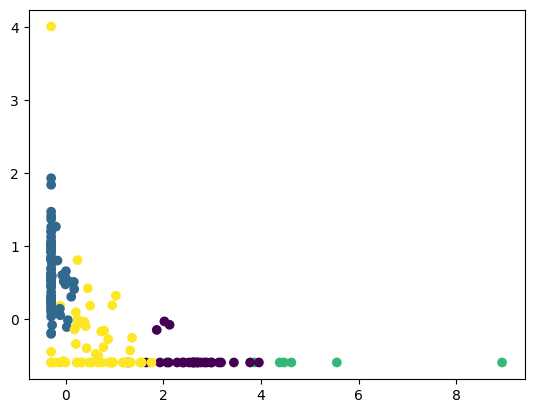

In [ ]:
# tsne1 = TSNE(random_state=42)
# tsne_features = tsne1.fit_transform(violent_features)
kmeans1 = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans1.fit_predict(violent_features)
print(cluster_labels)
plt.scatter(violent_features[:, 0], violent_features[:, 1], c=cluster_labels)
plt.show()


# Clustering using UMAP with kmeans

In [ ]:
umapp1 = UMAP(random_state=42)
umap_features = umapp1.fit_transform(violent_features)
kmeans2 = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans2.fit_predict(umap_features)
print(cluster_labels)
plt.scatter(umap_features[:, 0], umap_features[:, 1], c=cluster_labels)
plt.show()

NameError: name 'violent_features' is not defined

# Clustering using UMAP with DBSCAN

[ 0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1  0  0  0 -1  0  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1  0  0
  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0
 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1  0  0 -1  0  0 -1  0 -1 -1  0  0  0 -1 -1  0 -1  0  0  0 -1 -1  0
 -1 -1 -1 -1  0  0 -1 -1  0  0  0  0  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1  0
  0  0  0  0  0 -1 -1  0  0 -1  0 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1  0  0]


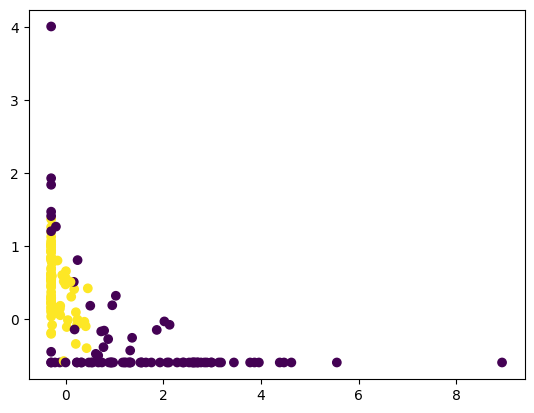

In [ ]:
# umapp2 = UMAP(random_state=42)
# umap_features = umapp2.fit_transform(violent_features)
dbscan1 = DBSCAN(eps=0.8, min_samples=10)
cluster_labels = dbscan1.fit_predict(violent_features)
print(cluster_labels)
plt.scatter(violent_features[:, 0], violent_features[:, 1], c=cluster_labels)
plt.show()

# Clustering using T-SNE with DBSCAN

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


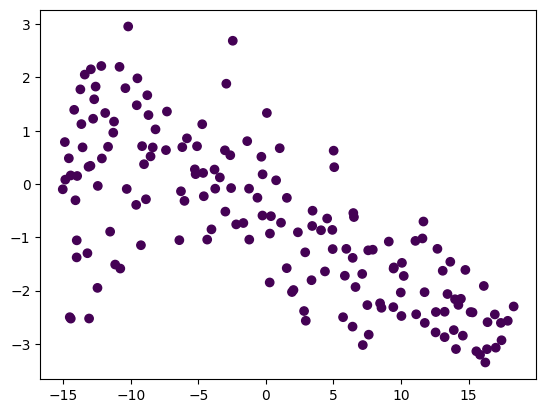

In [ ]:
tsne2 = TSNE(random_state=42)
tsne_features = tsne2.fit_transform(violent_features)
dbscan2 = DBSCAN(eps=0.5, min_samples=10)
cluster_labels = dbscan2.fit_predict(tsne_features)
print(cluster_labels)
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=cluster_labels)
plt.show()

################################################################################
# **Test data**

In [ ]:
test_data,labels_test = get_videos_data(test_path)
test_sequences = convert_to_sequences(test_data, sequence_length)
X_test = np.array(test_sequences)
labels_test = np.array(labels_test)
labels_test = to_categorical(labels_test, 2)
X_test = X_test.reshape(-1, sequence_length, frame_height * frame_width)

inp = model.input
outputs = [layer.output for layer in model.layers]
functors = [K.function([inp], [out]) for out in outputs]
layers_outputs = [func([X_test]) for func in functors]
features_test = layers_outputs[1]
features_test = np.array([features_test])[0,0]
print(features_test)
print(np.shape(features_test))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(400, 64)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 3 0 0 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 3 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 3 3 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 3 0 1 2 1 0 0 0 0 0 0 0 3 0 0 0 0 2
 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 3
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


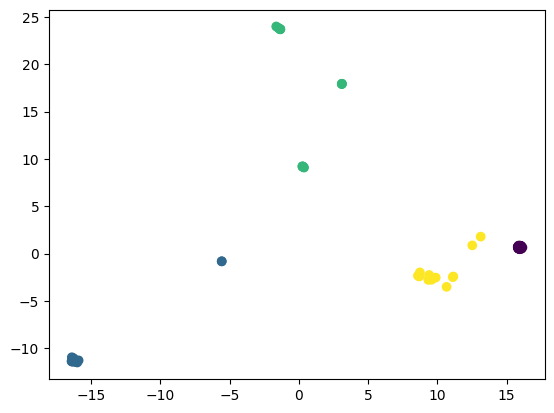

In [ ]:
umap_features_test = umapp1.transform(features_test)
cluster_labelst = kmeans2.predict(umap_features_test)
print(cluster_labelst)
plt.scatter(umap_features_test[:, 0], umap_features_test[:, 1], c=cluster_labelst)
plt.show()